In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [7]:
# Class distribution
print(df['label'].value_counts())

# Nulls
print(df.isnull().sum())

# Shape
print(df.shape)


label
ham     4825
spam     747
Name: count, dtype: int64
label      0
message    0
dtype: int64
(5572, 2)


In [8]:
import string

In [12]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00


In [13]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords # for removing common English words
from nltk.stem import PorterStemmer # for stemming (reducing words to root)

In [15]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # lowercase the text
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # split into words and remove stopwords + stem
    tokens = text.split()
    cleaned = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return " ".join(cleaned)


In [16]:
df['cleaned_message'] = df['message'].apply(clean_text)


In [17]:
df.head()

,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [18]:
df[['message', 'cleaned_message']].head()


,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [19]:
#vectorization of messages cuz r ml model is naive over these texts
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
vectorizer = TfidfVectorizer(max_features=3000)

# Fit and transform the cleaned messages
X = vectorizer.fit_transform(df['cleaned_message']).toarray()


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])  # ham = 0, spam = 1


In [21]:
X.shape, y.shape


((5572, 3000), (5572,))

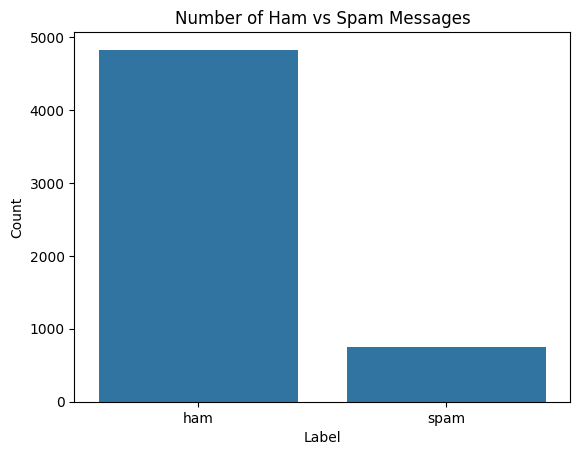

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title('Number of Ham vs Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [23]:
df['message_length'] = df['message'].apply(len)


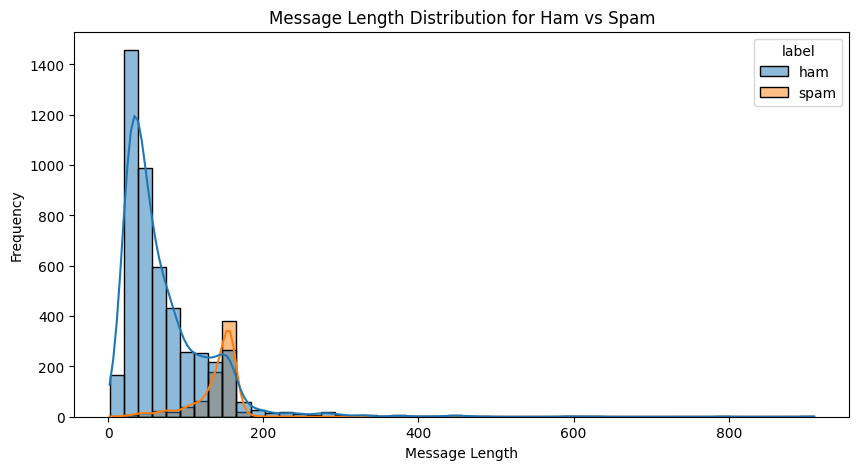

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution for Ham vs Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [26]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4457, 3000)
(1115, 3000)
(4457,)
(1115,)


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
nb_model = MultinomialNB()

# Train it
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97847533632287

Confusion Matrix:
 [[965   0]
 [ 24 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

